# **ΠΑΝΕΠΙΣΤΗΜΕΙΟ ΠΕΙΡΑΙΩΣ**

***ΤΜΗΜΑ ΠΛΗΡΟΦΟΡΙΚΗΣ***


---
*ΕΞΕΤΑΣΤΙΚΗ ΙΟΥΝΙΟΥ 2021*

*Υλοποίηθηκε απο τον φοιτητή:*

*ΒΕΡΓΙΑΝΝΗ ΝΙΚΟΛΑΟ - Π16170*


---






# **Blocks World Problem**

To πρόβλημα Blocks World  είναι γνωστό και ως Sussman Anomaly. 

Λέγεται ανώμαλο διότι οι μη παρεμβαλλόμενοι σχεδιαστές των αρχών της δεκαετίας του 1970 δεν μπόρεσαν να λύσουν αυτό το πρόβλημα. Το πρόβλημα έχει ως εξής: Τρία μπλοκ με την ένδειξη "A", "B", "C" αφήνονται να ακουμπήσουν σε επίπεδη επιφάνεια. Η δεδομένη προϋπόθεση είναι ότι μόνο ένα μπλοκ μπορεί να μετακινηθεί κάθε φορά για την επίτευξη του στόχου. Η κατάσταση έναρξης και η τελική κατάσταση φαίνονται στο παρακάτω διάγραμμα. 

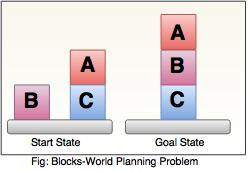


Η παρούσα εργασία υλοποιεί έναν πράκτορα που μπορεί να επιλύσει προβλήματα Block World με τον βέλτιστο τρόπο( στον ελάχιστο αριθμό κινήσεων) για μια αυθαίρετη αρχική διάταξη μπλοκ (A-Z, 26 μπλοκ μέγιστο). Η τεχνική πίσω απο τον πράκτορα είναι: Generate και Test για να δημιουργήοσυμε μια πιθανή κατάσταση και στην συνέχεια χρησιμοποιεί Means-Ends Analysis για να επιλέξει την καλύτερη κατάσταση να μετακινηθεί.

Ο πράκτορας σχεδιάστηκε για να προσπαθεί πάντα να μετακινεί πρώτα το επάνω μπλοκ της αριστερής στοίβας στη δεξιά στοίβα, ακολουθούμενο απο έλεγχο εάν η διαφορά έχει μειωθεί. Εάν ναι, τότε αυτή είναι η βέλτιστη κίνηση. Εάν όχι, τότε μετακινεί το επάνω μπλοκ στο τραπέζι, skipparei αν υπάρχει ήδη μπλοκ στον πίνακα και στην συνέχεια χρησιμοποιεί αυτήν την κατάσταση ως την νέα κατάσταση.

Ο πράκτορας θα διατηρήσει αυτήν την λειτουργία για κάθε μπλοκ της αριστερής στοίβας εως ότου η διαφορά φτάσει στο μηδέν, πράγμα που σημαίνει ότι έχει φτάσει στην κατάσταση στόχου. Μια τέτοια μέθοδος θα μπορούσε να διασφαλίσει οτι πάντα επιλέγονται οι βέλτιστες κινήσεις

Η μέθοδος επίλυσης θα πρέπει να λάβει σαν είσοδο 2 διευθετήσεις μπλοκ. Οι διευθετήσεις δίνονται σαν λίστες λιστών. Το πρώτο μπλοκ κάθε λίστας βρίσκεται στο τέλος της στοίβας και η λίστα συνεχίζει προς τα πάνω. Για παραδείγμα η λίστα [A,B,C] τοποθετεί το μπλοκ Β πάνω απο το Α και το C πανω απο Β, στην κορυφή δηλαδή.

Στόχος είναι να επιστρέψουμε μια λίστα κινήσεων που θα μετατρέψουν την αρχική κατάσταση στην κατάσταση στόχου.Οι κινήσεις παρουσιάζονται σαν 2 πλειάδες όπου το πρώτο αντικείμενο είναι ποιο μπλόκ θα μετακινήθει και το δεύτερο που θα μεταφερθεί: είτε πάνω απο κάποιο μπλοκ είτε στο τραπέζι.

In [1]:
import copy
import string
import random

In [2]:
class BlocksWorld:

    def __init__(self):
        pass

    def solve(self, start, goal): 

        class State:
            def __init__(self, stack1, stack2, total, moves=None):
                if moves is None:
                    moves = []
                self.stack1 = stack1
                self.stack2 = stack2
                self.total= total
                self.moves = moves

            def __eq__(self, other):
                return (self.stack1 == other.stack1 and self.stack2 == other.stack2
                        and self.total == other.total and self.moves == other.moves)

            def goal_state_move(self):
                while self.difference() != 0:
                    self = self.select_move()
                return self.moves

            def select_move(self):  # tha epistrepsei thn kalyterh kinhsh
                #metakinisi teleutaiou block sthn stoiva
                #an den meiwthei h diafora, metakinisi sto trapezi
                for index, stack in enumerate(self.stack1):
                    for index2, stack2 in enumerate(self.stack1):
                        if index != index2:  
                            curr_table, move = self.valid_state_move(self.stack1, index, index2)
                            new_state = State(curr_table, self.stack2, self.total, copy.copy(self.moves))
                            new_state.moves.append(move)
                            if new_state.difference() < self.difference():
                                return new_state

                # metakinisi teleutaiou block sto trapezi
                # an vrisketai sto trapezi skip
                for index, stack in enumerate(self.stack1):
                    if len(stack) > 1:  
                        curr_table, move = self.valid_state_move(self.stack1, index, -1)  # -1 = trapezi
                        new_state = State(curr_table, self.stack2, self.total, copy.copy(self.moves))
                        new_state.moves.append(move)
                        if new_state.difference() <= self.difference():
                            return new_state

            def valid_state_move(self, table, start_index, end_index):
                temp_table = copy.deepcopy(table)
                left = temp_table[start_index]
                top_block = left.pop()
                right = []

                if end_index < 0:  # metakinisi sto trapezi (-1)
                    temp_table.append(right)
                    move = (top_block, 'Table')
                else:  # metakinisi stin stoiva
                    right = temp_table[end_index]
                    move = (top_block, right[-1])
                right.append(top_block)

                if len(left) == 0:
                    temp_table.remove(left)
                return temp_table, move

            def difference(self):
                same_num = 0
                # sygkrisi twn stoivwn
                for left in self.stack1:
                    for right in self.stack2:
                        index = 0
                        while index < len(left) and index < len(right):
                            if left[index] == right[index]:
                                same_num += 1
                                index += 1
                            else:
                                break
                diff = self.total - same_num
                return diff

        total = 0
        for l in start:
            for e in l:
                total += 1
        state = State(start, goal, total)
        solution = state.goal_state_move()

        return solution

In [3]:
test = BlocksWorld()


stacks = int(input("Eisagete arithmo stoivwn: "))
blocks = int(input("Eisagete arithmo block: "))

def startState(stacks, blocks):
  ls = stacks
  b = list(string.ascii_uppercase) #string.digits
  blocks_list = b[:blocks]
  random.shuffle(blocks_list)

  problem_state = []
  while blocks:
    if not blocks_list: break

    if stacks == 1:
       problem_state.append(blocks_list)
       break

    else:
      r = random.randint(1,blocks)
      s = blocks_list[:r]
      problem_state.append(s)

    blocks -=r
    stacks -= 1
    blocks_list = blocks_list[r:]
  while len(problem_state) < ls:
    problem_state += [[]]
  
  random.shuffle(problem_state)
  return problem_state


startSt = startState(stacks, blocks)

def goal_generator(startSt):
  goal = []
  for stack in startSt:
      goal += stack
  goal.sort()
  goal = [goal]

  for i in range(len(startSt)-1):
      goal += [[]]
  return goal

goalSt = goal_generator(startSt)


print("Start State: ", startSt)
print("Goal State: ", goalSt)
print("Lysh: ", test.solve(startSt, goalSt))

Eisagete arithmo stoivwn: 3
Eisagete arithmo block: 15
Start State:  [['E', 'J', 'N', 'O', 'D', 'A'], ['G', 'L', 'C', 'B'], ['M', 'K', 'H', 'I', 'F']]
Goal State:  [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'], [], []]
Lysh:  [('A', 'Table'), ('B', 'A'), ('C', 'B'), ('D', 'C'), ('O', 'Table'), ('N', 'Table'), ('J', 'Table'), ('E', 'D'), ('F', 'E'), ('L', 'Table'), ('G', 'F'), ('I', 'Table'), ('H', 'G'), ('I', 'H'), ('J', 'I'), ('K', 'J'), ('L', 'K'), ('M', 'L'), ('N', 'M'), ('O', 'N')]


# **Water Jug Problem**

Στο πρόβλημα της κανάτας νερού στην Τεχνητή Νοημοσύνη, μας παρέχονται δύο κανάτες οι οποίες περιέχουν έναν γνωστό ακέραιο όγκο υγρού, όχι απαραίτητα ίσο με την χωρητικότητα της. Στόχος είναι να βρεθούν πόσα βήματα ρίψης νερού απο την μία κανάτα στην άλλη ( μέχρι να αδειάσει είτει η μια κανάτα είτε η άλλη να γεμίσει) για να επιτευχθεί η κατάσταση στόχου, που καθορίζεται απο τον χρήστη.

**Αναπαράσταση κατάστασης:**

Θα αντιπροσωπεύσουμε μια κατάσταση του προβλήματος ως πλειάδα (x,y) όπου το x αντιπροσωπεύει την ποσότητα νερού στην κανάτα Α  και το y αντιπροσωπεύει την ποσότητα στην κανάτα Β. 
Σημειώνεται ότι 0 <= x <= χωρητικότητα_y και 0 <= y <= χωρητικότητα_y. 

**Κανόνες Παραγωγής:**

*   (x, y) -> (a, y) if x < a
*   (x, y) -> (x, b) if y < b
*   (x, y) -> (0, y) if x > 0
*   (x, y) -> (x, 0) if y > 0
*   (x, y) -> (min(x+y, a), max(0, x+y - a)) if y > 0
*  (x, y) -> (max(0, x+y - b), min(x+y, b)) if x > 0

Αυτοί οι κανόνες παραγωγής χρησιμοποιούνται για την εύρεση των γειτονικών καταστάσεων από τις τρέχουσες καταστάσεις.
Ο αλγόριθμος έχει ως εξής:





1.   Δημιουργία κενού μονοπατιού
2.   Προσθήκη αρχικής κατάστασης στην ουρά
3.   Αν επισκευτεί την μαρκάρουμε σαν visited
4.   Αν η front είνια κενή, ακολουθούμε τα βήματα 5-7
5.   Αφαιρούμε την κατάσταση απο την front και την ονομάζουμε current. Προσθέτουμε την current στην path list.
6.   Αναπτύσουμε τους γείτονες σύμφωνα με τους κανόνες παραγωγής.
7.   Αν οι γείτονες δεν είναι visited, τους προσθέτουμε στην λίστα visited και τους προσθέτουμε στην ουρά front
8.   Επιστρέφουμε το μονοπάτι











Ο χρήστης θα ορίσει ενα σύνολο τελεστών που θα μας μεταφέρουν απο την μία κατάσταση στην άλλη. 

Κανάτα Α: x γαλόνια νερού 

Κανάτα Β: y γαλόνια νερού

Στόχος: z γαλόνια σε μια κανάτα

In [4]:
a_capacity = int(input("Xwritikotita kanatas A: "))
b_capacity = int(input("Xwritikotita kanatas B: "))
goal = int(input("Stoxos: "))

Xwritikotita kanatas A: 5
Xwritikotita kanatas B: 3
Stoxos: 2


In [5]:
def gcd(a, b):
 if a == 0:
		 return b
 else:
	    return gcd(b%a, a)

In [6]:
def bfs(start, goal, a_capacity, b_capacity):
	path = []
	front = []
	front.append(start)
	visited = []
	#visited.append(start)
	while(not (not front)):
		current = front.pop()
		x = current[0]
		y = current[1]
		path.append(current)
		if x == goal or y == goal:
			print ("Vrethike Lysh")
			return path
		# kanonas 1
		if current[0] < a_capacity and ([a_capacity, current[1]] not in visited):
			front.append([a_capacity, current[1]])
			visited.append([a_capacity, current[1]])

		# kanonas 2
		if current[1] < b_capacity and ([current[0], b_capacity] not in visited):
			front.append([current[0], b_capacity])
			visited.append([current[0], b_capacity])

		# kanonas 3
		if current[0] > a_capacity and ([0, current[1]] not in visited):
			front.append([0, current[1]])
			visited.append([0, current[1]])

		# kanonas 4
		if current[1] > b_capacity and ([a_capacity, 0] not in visited):
			front.append([a_capacity, 0])
			visited.append([a_capacity, 0])

		# kanonas 5
		#(x, y) -> (min(x + y, a_capacity), max(0, x + y - a_capacity)) if y > 0
		if current[1] > 0 and ([min(x + y, a_capacity), max(0, x + y - a_capacity)] not in visited):
			front.append([min(x + y, a_capacity), max(0, x + y - a_capacity)])
			visited.append([min(x + y, a_capacity), max(0, x + y - a_capacity)])

		# kanonas 6
		# (x, y) -> (max(0, x + y - b_capacity), min(x + y, b_capacity)) if x > 0
		if current[0] > 0  and ([max(0, x + y - b_capacity), min(x + y, b_capacity)] not in visited):
			front.append([max(0, x + y - b_capacity), min(x + y, b_capacity)])
			visited.append([max(0, x + y - b_capacity), min(x + y, b_capacity)])

	return "Den vrethike"


# start state: a = 0 , b = 0
start = [0, 0] 


if goal % gcd(a_capacity,b_capacity) == 0:
	 print("Monopati:",bfs(start, goal, a_capacity, b_capacity))
else:
 	 print("Den vrethike lysh")

Vrethike Lysh
Monopati: [[0, 0], [0, 3], [3, 0], [3, 3], [5, 1], [5, 3], [5, 0], [2, 3]]


**ΠΕΡΙΓΡΑΦΗ ΛΥΣΗΣ**

*Αρχική Κατάσταση*: Κανάτα Α = 0 Κανάτα Β = 0 **[0,0]**

*Επόμενη Κατάσταση*: Γεμίζουμε την κανάτα Β **[0,3]**

*Επόμενη Κατάσταση*: Αδειάζουμε την κανάτα Α στην κανάτα Β **[3,0]**

*Επόμενη Κατάσταση*: Γεμίζουμε την κανάτα Β **[3,3]**

*Επόμενη Κατάσταση*: Γεμίζουμε την κανάτα Α ρίχνοντας 2 λίτρα απο την κανάτα Β **[5,1]**

*Επόμενη Κατάσταση*: Γεμίζουμε την κανάτα Β **[5,3]**

*Επόμενη Κατάσταση*: Αδειάζουμε την κανάτα Β καθώς έχουμε τα απαραίτητα λίτρα **[5,0]**

*Επόμενη Κατάσταση*:Γεμίζουμε την κανάτα Β μέχρι να έχουμε 2 λίτρα σε μία κανάτα **[2,3]** όπου είναι και ο τελικός μας στόχος.